In [1]:
%matplotlib inline
import sys
import os
import os.path
import subprocess
import numpy as np

import tables as tb
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import ZScaleInterval
from astropy.table import Table, vstack, Column
from astropy.io import ascii

from datetime import datetime

import glob

from astropy.table import unique

# Now select shots to use

In [27]:
tt = ascii.read("/Users/mxhf/ownCloudRZG/work/MPE/hetdex/src/deep_and_repeat/COSMOS/hwconfig_mastertable.txt", format="ecsv")

In [28]:
tt = unique(tt)

In [29]:
len(tt)

59946

In [30]:
if "date" in tt.colnames:
    tt.remove_column("date")
tt.add_column(Column([datetime.strptime(shotid[:8], "%Y%m%d") for shotid in tt["shotid"]], name="date"), 1 )

In [31]:
# only use data from >= 2018
ii  = tt["intdate"] >= 20180000
# hetdex-like exposure times
ii *= np.array(tt["minexptime"]) >= 360.
ii *= np.array(tt["minexptime"]) <= 500.
if "use" in tt.colnames:
    tt.remove_column("use")

tt.add_column(Column(ii,name="use"))

In [32]:
tt[ tt["use"] ]

shotid,date,intdate,shotnum,contid,ifuid,ifuslot,specid,hwids,minexptime,use
str12,object,int64,int64,str8,int64,int64,int64,str19,float64,bool
20180104v007,2018-01-04 00:00:00,20180104,7,S/N 0022,39,22,317,022-039-317-SN-0022,366.64923095703125,True
20180104v007,2018-01-04 00:00:00,20180104,7,S/N 0026,22,86,17,086-022-017-SN-0026,366.64923095703125,True
20180104v007,2018-01-04 00:00:00,20180104,7,S/N 0027,53,36,311,036-053-311-SN-0027,366.64923095703125,True
20180104v007,2018-01-04 00:00:00,20180104,7,S/N 0036,19,103,13,103-019-013-SN-0036,366.64923095703125,True
20180104v007,2018-01-04 00:00:00,20180104,7,S/N 0038,74,44,202,044-074-202-SN-0038,366.64923095703125,True
20180104v007,2018-01-04 00:00:00,20180104,7,S/N 0040,54,93,8,093-054-008-SN-0040,366.64923095703125,True
20180104v007,2018-01-04 00:00:00,20180104,7,S/N 0041,15,84,41,084-015-041-SN-0041,366.64923095703125,True
20180104v007,2018-01-04 00:00:00,20180104,7,S/N 0044,23,83,319,083-023-319-SN-0044,366.64923095703125,True
20180104v007,2018-01-04 00:00:00,20180104,7,S/N 0048,31,73,203,073-031-203-SN-0048,366.64923095703125,True


In [33]:
ll = [ (r["shotid"] + "_{:03d}".format(r["ifuslot"])) for r in tt[ tt["use"] ] ]

In [34]:
ll = np.unique( list( zip( tt[ tt["use"] ]['shotid'], tt[ tt["use"] ]['ifuslot'] ) ) )

In [35]:
len(tt)

59946

In [36]:
len( np.unique( tt[tt["use"]]["shotid"]) ) * 50

51250

In [37]:
len( np.unique(ll) )

1074

In [38]:
print("Using {} out of {}".format(np.sum( ii ),len(tt) ))

Using 39538 out of 59946


In [39]:
# make shure that Chenxu's shot is contained
tt[( tt["intdate"] == 20180618) * (tt["shotnum"] == 17 ) ]

shotid,date,intdate,shotnum,contid,ifuid,ifuslot,specid,hwids,minexptime,use
str12,object,int64,int64,str8,int64,int64,int64,str19,float64,bool
20180618v017,2018-06-18 00:00:00,20180618,17,S/N 0022,39,22,317,022-039-317-SN-0022,366.9017333984375,True
20180618v017,2018-06-18 00:00:00,20180618,17,S/N 0024,10,37,313,037-010-313-SN-0024,366.9017333984375,True
20180618v017,2018-06-18 00:00:00,20180618,17,S/N 0026,22,86,17,086-022-017-SN-0026,366.9017333984375,True
20180618v017,2018-06-18 00:00:00,20180618,17,S/N 0027,53,36,311,036-053-311-SN-0027,366.9017333984375,True
20180618v017,2018-06-18 00:00:00,20180618,17,S/N 0028,13,24,303,024-013-303-SN-0028,366.9017333984375,True
20180618v017,2018-06-18 00:00:00,20180618,17,S/N 0030,44,72,325,072-044-325-SN-0030,366.9017333984375,True
20180618v017,2018-06-18 00:00:00,20180618,17,S/N 0035,62,63,322,063-062-322-SN-0035,366.9017333984375,True
20180618v017,2018-06-18 00:00:00,20180618,17,S/N 0036,19,103,13,103-019-013-SN-0036,366.9017333984375,True
20180618v017,2018-06-18 00:00:00,20180618,17,S/N 0038,74,44,202,044-074-202-SN-0038,366.9017333984375,True


In [40]:
import matplotlib
dates = matplotlib.dates.date2num(tt["date"])

In [41]:
uhwids = np.unique(tt["hwids"])

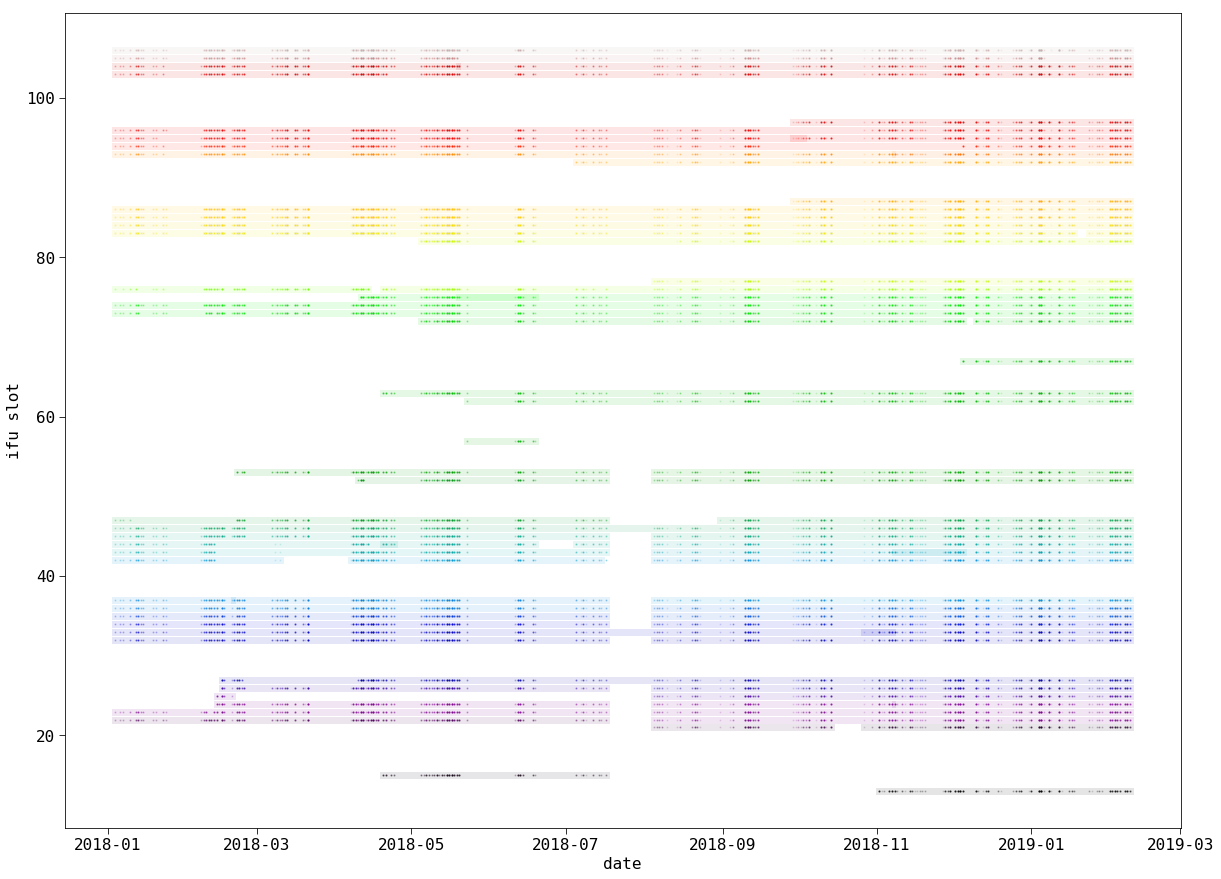

In [42]:
# plot
f = plt.figure(figsize=[20,15])
ax = plt.subplot(111)

N = len(uhwids)
cmap = plt.cm.nipy_spectral

for i, hwid in enumerate(uhwids):
    color = cmap(i/N)
    ii = tt["hwids"] == hwid
    l = plt.plot_date(dates[ii * tt["use"]], tt["ifuslot"][ii* tt["use"]],'-', alpha=.1, lw=7, color=color)
    plt.plot_date(dates[ii * tt["use"]], tt["ifuslot"][ii* tt["use"]], alpha=.1, marker='.', color=l[0].get_color(), ms=2)
    
plt.xlabel("date")
plt.ylabel("ifu slot")
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)



#matplotlib.pyplot.plot_date(dates, values)

In [43]:
#r["contid"].format("", "-"),r["ifuid"], r["ifuslot"], r["specid"]
uifuslots = np.unique(tt["ifuslot"][tt["use"]])
for ifuslot in uifuslots:
    
    hwcfgs = np.unique( tt[(tt["ifuslot"] == ifuslot) * tt["use"]]["hwids"] )
    print("{:03d}: ".format(ifuslot) + (", ".join(hwcfgs)))

013: 013-043-401-SN-0072
015: 015-038-301-SN-0087
021: 021-073-315-SN-0097, 021-073-315-SN-0107
022: 022-039-317-SN-0022, 022-052-316-SN-0102
023: 023-010-313-SN-0024, 023-078-318-SN-0057
024: 024-013-303-SN-0028, 024-039-317-SN-0022, 024-039-317-SN-0049
025: 025-009-320-SN-0059, 025-013-303-SN-0028
026: 026-035-321-SN-0077, 026-078-318-SN-0057
027: 027-011-314-SN-0047
032: 032-020-320-SN-0059, 032-052-316-SN-0102
033: 033-002-310-SN-0069, 033-002-310-SN-0107
034: 034-003-304-SN-0083, 034-056-305-SN-0078
035: 035-041-302-SN-0052, 035-041-302-SN-0053, 035-074-202-SN-0074
036: 036-041-302-SN-0053, 036-053-311-SN-0027
037: 037-010-313-SN-0024, 037-010-313-SN-0107, 037-057-306-SN-0068
042: 042-030-321-SN-0077, 042-073-315-SN-0089, 042-073-315-SN-0097, 042-073-315-SN-0107
043: 043-040-323-SN-0022, 043-040-323-SN-0050, 043-057-306-SN-0068
044: 044-045-304-SN-0083, 044-074-202-SN-0038, 044-074-202-SN-0074, 044-074-202-SN-0107
045: 045-056-305-SN-0078, 045-065-312-SN-0084
046: 046-005-309-SN-0

In [44]:
def get_hwconfig(shotid, ifuslot):
    # for a shot and a ifuslot find the hawrdware configuration (= hwid)
    jj = tt["shotid"] == shotid
    jj *= tt["ifuslot"] == ifuslot
    
    uhwids = np.unique(tt[jj]["hwids"])
    if not len(uhwids) == 1:
        print("Error could not uniquely identify hardware configuration.")
        return
    return uhwids[0]

def get_shots_for_hwconfig(hwid):
    # now find *all* shots that had that hwardware configuration
    jj = tt["hwids"] == hwid
    shotids = np.unique( tt["shotid"][jj] )
    return Table([shotids])

hwid  = get_hwconfig("20181102v011", 13) 
shotids = get_shots_for_hwconfig(hwid)

In [56]:
outdir = "/Users/mxhf/ownCloudRZG/work/MPE/hetdex/src/deep_and_repeat/COSMOS/shotlists"
if not os.path.exists(outdir):
    os.makedirs(outdir)

N = len(uhwids)
for i,hwid in enumerate(uhwids):
    print("Progress {:2.1%}".format(i / N ), end="\r")
    outfilename = "{}/shotlist_PCA_{}.txt".format(outdir, hwid)
    jj = (tt["hwids"] == hwid) * tt["use"]
    with open(outfilename, 'w') as f:
        for shotid in tt[jj]["shotid"]:
            f.write(shotid + "\n")        

In [57]:
!ls /Users/mxhf/ownCloudRZG/work/MPE/hetdex/src/deep_and_repeat/COSMOS/shotlists

shotlist_PCA_013-043-401-SN-0072.txt shotlist_PCA_063-062-322-SN-0035.txt
shotlist_PCA_015-038-301-SN-0087.txt shotlist_PCA_067-058-205-SN-0094.txt
shotlist_PCA_021-073-315-SN-0097.txt shotlist_PCA_072-044-325-SN-0022.txt
shotlist_PCA_021-073-315-SN-0107.txt shotlist_PCA_072-044-325-SN-0030.txt
shotlist_PCA_022-039-317-SN-0022.txt shotlist_PCA_073-031-037-SN-0059.txt
shotlist_PCA_022-039-317-SN-0049.txt shotlist_PCA_073-031-037-SN-0089.txt
shotlist_PCA_022-052-316-SN-0102.txt shotlist_PCA_073-031-203-SN-0048.txt
shotlist_PCA_023-010-313-SN-0024.txt shotlist_PCA_074-076-307-SN-0105.txt
shotlist_PCA_023-078-318-SN-0057.txt shotlist_PCA_075-075-047-SN-0052.txt
shotlist_PCA_024-013-303-SN-0028.txt shotlist_PCA_075-075-047-SN-0053.txt
shotlist_PCA_024-039-317-SN-0022.txt shotlist_PCA_075-075-047-SN-0074.txt
shotlist_PCA_024-039-317-SN-0049.txt shotlist_PCA_075-075-047-SN-0083.txt
shotlist_PCA_025-009-320-SN-0059.txt shotlist_PCA_076-032-025-SN-0027.txt
shotlist_PCA_025-013-303-SN-0028.txt s

# old stuff

In [66]:
ushotids = np.unique(tt["shotid"][tt["use"]])

N = len(ushotids)
for i,shotid in enumerate(ushotids):
    print("Progress {:2.1%}".format(i / N ), end="\r")
    
    jj = tt["shotid"] == shotid
    uifuslots = np.unique(tt["ifuslot"][jj])
    for ifuslot in uifuslots:
        hwid  = get_hwconfig(shotid, ifuslot) 
        shotids = get_shots_for_hwconfig(hwid)
        if not os.path.exists(os.path.join(outdir, shotid)):
            os.makedirs(os.path.join(outdir, shotid))
        outfilename = "{}/{}/shotlist_PCA_{}_ifu{:03d}.txt".format(outdir, shotid, shotid, ifuslot)
        shotids.write(outfilename, format='ascii.no_header', overwrite=True)
        #print("Wrote {}".format(outfilename))
        
        outfilename = "{}/{}/shotlist_{}_ifu{:03d}.txt".format(outdir, shotid, shotid, ifuslot)
        with open(outfilename, 'w') as f:
            f.write(shotid)
        #np.savetxt("/work/04287/mxhf/maverick/hetdex/cubes/shotlist_PCA_{}_{}.txt".format(shotid, ifuslot), shotids, encoding='latin1')

In [55]:
! rm -rf $outdir